In [ ]:
 # Importing required tools.

# Regular EDA (exploratory data analysis) and plotting libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to make plots appear inside the notebook.
%matplotlib inline

# Getting models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# For evaluating the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**Importing Data**

In [ ]:
df = pd.read_csv('/content/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape # (rows, columns)

(303, 14)

**Data Exploration**

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# No missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Let's understand our columns better:**

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**Analysing the 'target' variable**

In [ ]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64


dataset["target"].describe(): This displays descriptive statistics for the "target" column. The output shows:

"count": the number of entries in the column (303 in this case)

"mean": the average value of the entries (0.544554)

"std": the standard deviation of the entries (0.498835)

"min": the minimum value of the entries (0.000000)

"25%": the 25th percentile of the entries (0.000000)

"50%": the median of the entries (1.000000, meaning that half of the entries are equal to 1)

"75%": the 75th percentile of the entries (1.000000)

"max": the maximum value of the entries (1.000000)

In [ ]:
df["target"].unique()

array([1, 0])

**Checking correlation between columns**

In [ ]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


The output shows that most columns in the dataset have a moderate positive correlation with the "target" column, except for "fbs" (fasting blood sugar), which has a very weak correlation. The correlation coefficients range from 0.028046 (very weak correlation) to 0.436757 (moderate correlation).

Correlation coefficients range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation. A correlation coefficient of 0.43, for example, indicates a moderate positive correlation between the two variables.

In this case, a high correlation between a column and the "target" column could suggest that the column is a useful predictor of the target variable. However, it's important to note that correlation does not imply causation, and further analysis would be needed to determine whether a relationship between two variables is causal or spurious.

**Exploratory Data Analysis (EDA)**

**First, analysing the target variable:**

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

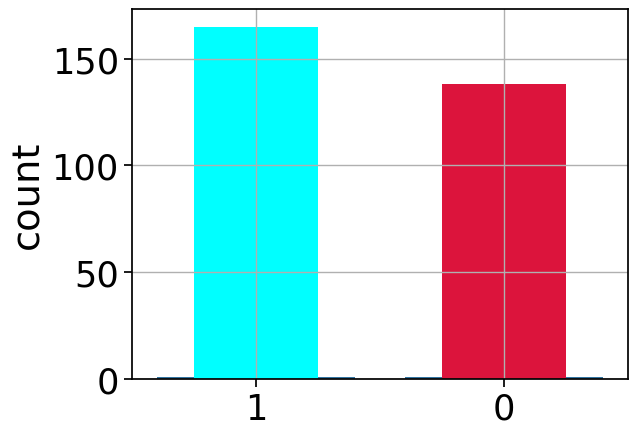

In [ ]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

target_temp.plot(kind='bar', color = ['cyan', 'crimson'], grid = True);
plt.xticks(rotation = 0)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


**We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features**

# **Analysing the 'Sex' feature**

In [ ]:
df["sex"].unique()

array([1, 0])

We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

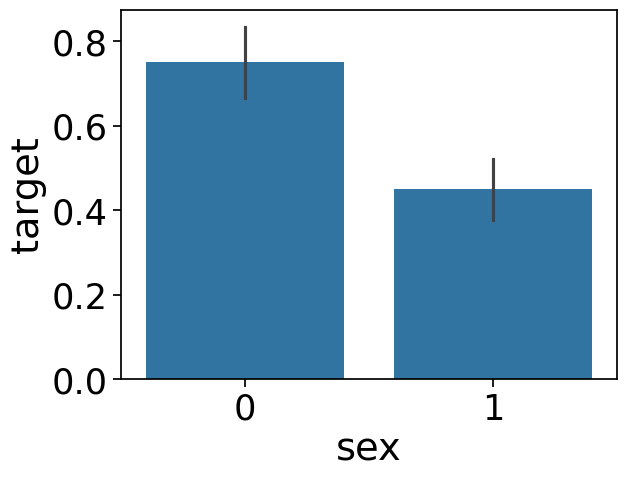

In [ ]:
# sns.barplot(df["sex"],y)
sns.barplot(x="sex", y=y, data=df)

**We notice, that females are more likely to have heart problems than males**

# **Analysing the 'Age' feature**

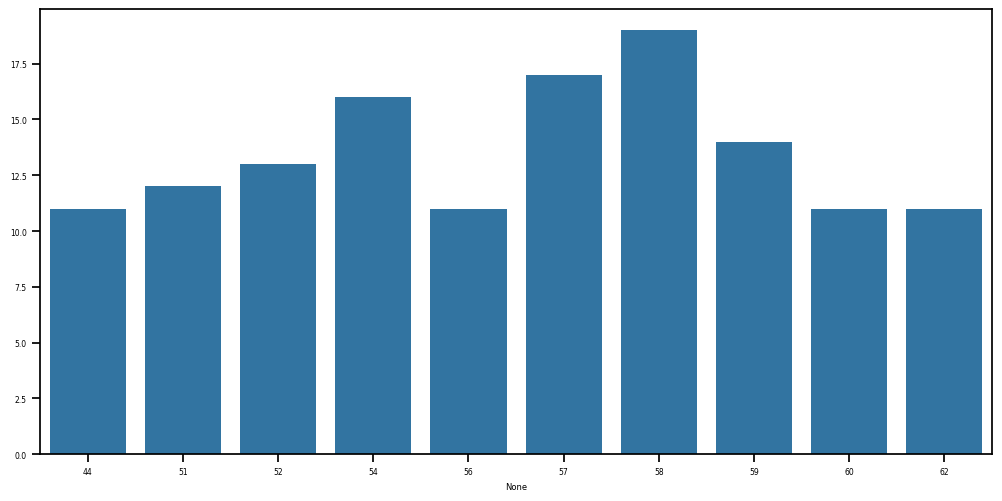

In [ ]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 0.5)
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

**Inference:**  Here we can see that the 58 age column has the highest frequency.

**Let’s check the range of age in the dataset.**

In [ ]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”

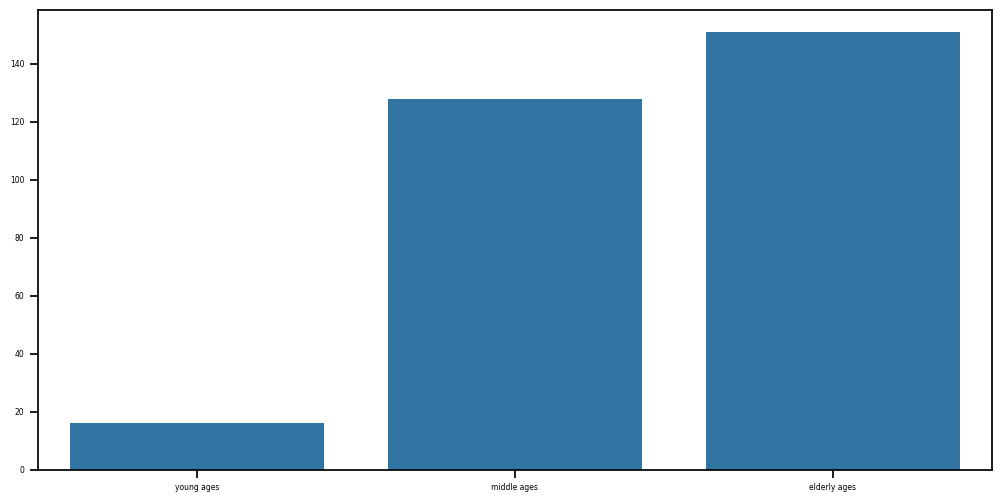

In [ ]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale = 0.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**Inference:** Here we can see that elder people are the most affected by heart disease and young ones are the least affected.

# **Analysing the 'Chest Pain Type' feature**

In [ ]:
df["cp"].unique()

array([3, 2, 1, 0])

As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

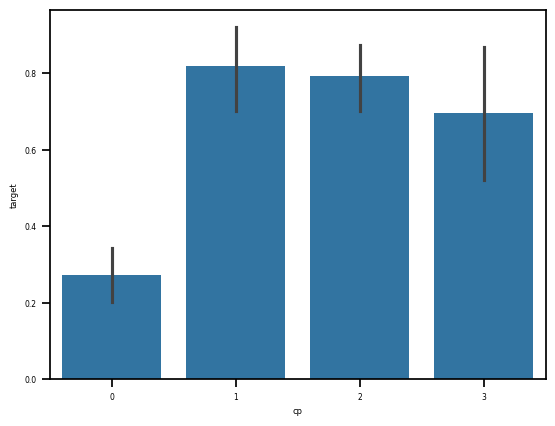

In [ ]:
sns.barplot( x="cp", y=y, data=df)

**We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems**

# **Analysing the FBS feature**

In [ ]:
df["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
df["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

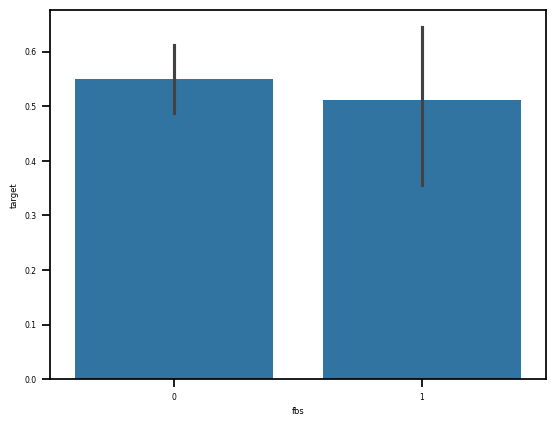

In [ ]:
sns.barplot(x="fbs",y=y,data=df)

Nothing extraordinary here

# **Analysing the restecg feature**

In [ ]:
df["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

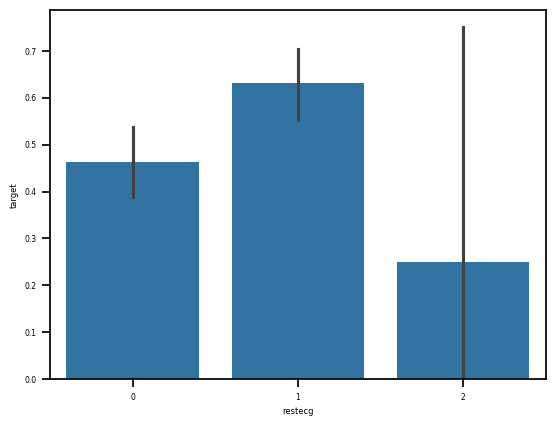

In [ ]:
sns.barplot(x= "restecg", y=y, data=df )

**We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

# **Analysing the 'exang' feature**

In [ ]:
df["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

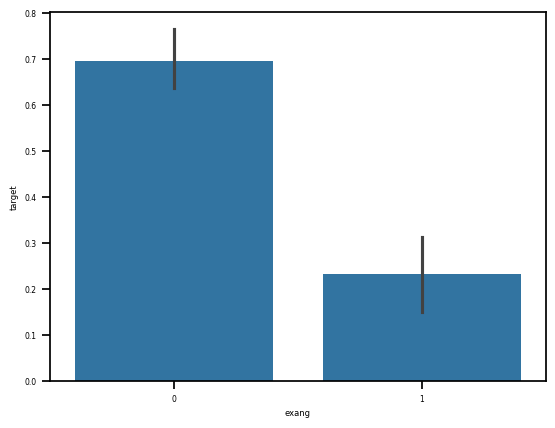

In [ ]:
sns.barplot(x= "exang", y=y, data=df)

**People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems**

# **Analysing the Slope feature**

In [ ]:
df["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

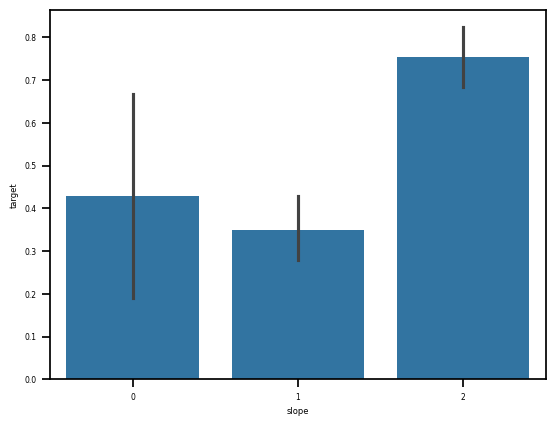

In [ ]:
sns.barplot(x="slope",y=y, data=df)

**We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'**

# **Analysing the 'ca' feature**

In [ ]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

[Text(0.5, 0, 'unique value'), Text(0, 0.5, 'Frequency')]

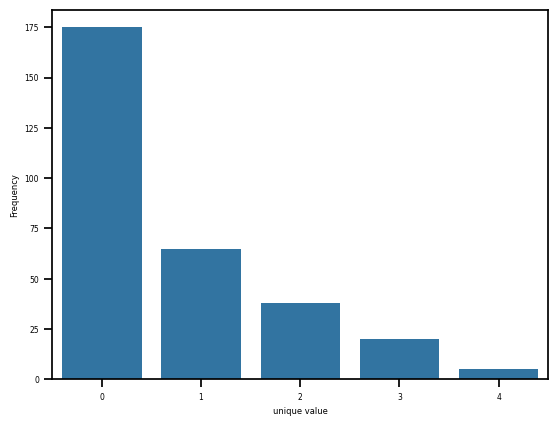

In [ ]:
# sns.countplot(df["ca"])
sns.countplot(x="ca", data=df).set(xlabel="unique value", ylabel="Frequency")

<Axes: xlabel='ca', ylabel='target'>

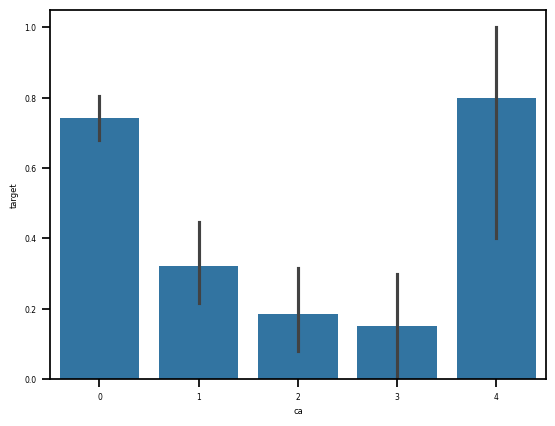

In [ ]:
sns.barplot(x="ca",y=y,data=df)

**ca=4 has astonishingly large number of heart patients**

# **Analysing the 'thal' feature**

In [ ]:
df["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

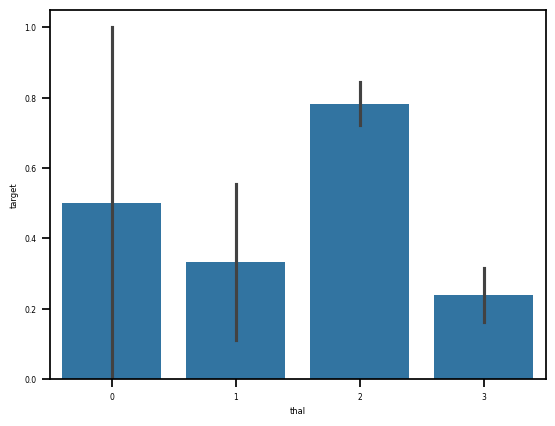

In [ ]:
sns.barplot(x="thal",y=y,data=df)

# **Correlation Matrix**

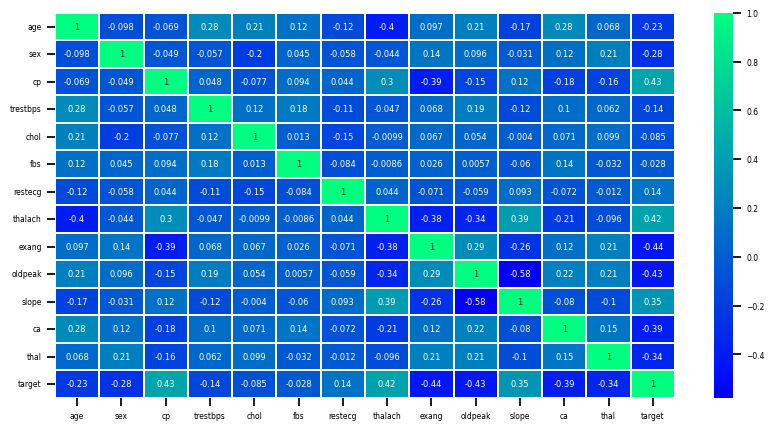

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

**Inference:**

From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.



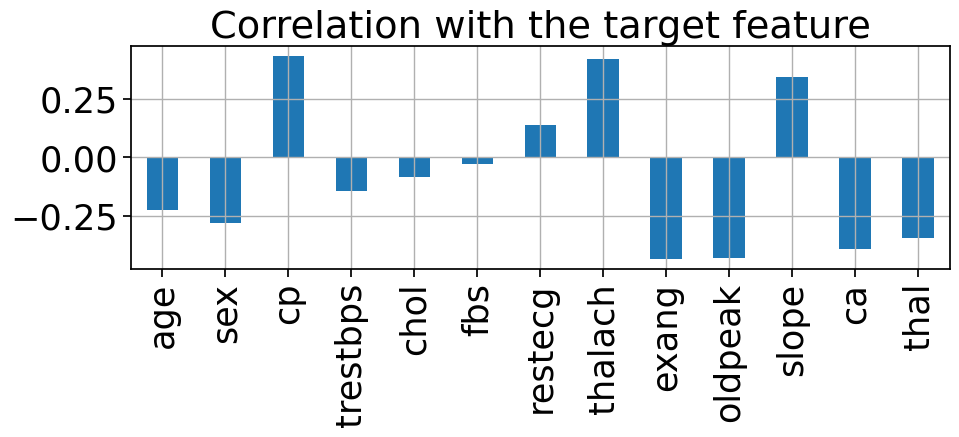

In [ ]:









.




                                                                                                                                                            sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(10, 5),
                                                        title="Correlation with the target feature")
plt.tight_layout()

**Inference:** Insights from the above graph are:

Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
Other features are negatively correlated with the target feature.


# **Feature Engineering**

**Now we will see the complete description of the continuous data as well as the categorical data**

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

Now here first we will be **removing the target column from our set of features** then we will categorize all the categorical variables using the get dummies method which will create a separate column **for each category suppose X variable contains 2 types of unique values then it will create 2 different columns for the X variable.**

In [ ]:
categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


**Now we will be using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy.**

In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


# **Model Fitting**

In [ ]:
from sklearn.metrics import accuracy_score

Split the dataset

In [ ]:
#Split data into X and y for training features and target variable
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
#Split data into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

**Logistic Regression**

Testing Accuracy for Logistic Regression: 0.8021978021978022
Testing Sensitivity for Logistic Regression: 0.7804878048780488
Testing Specificity for Logistic Regression: 0.82
Testing Precision for Logistic Regression: 0.7804878048780488


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


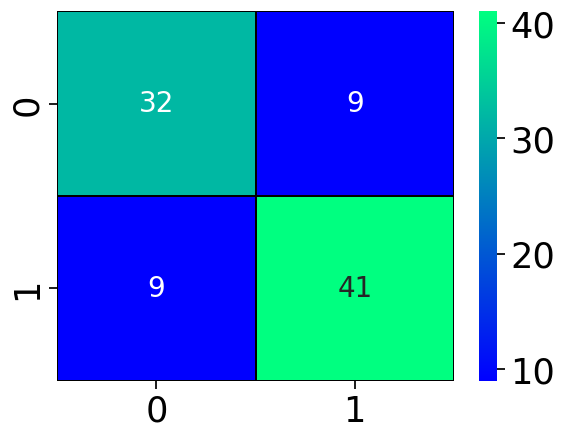

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



**Inference:** From the above report, we get the accuracy of the Logistic Regression classifier is about 86%.

 **Decision Tree**

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.92      0.98      0.95        50

    accuracy                           0.95        91
   macro avg       0.95      0.94      0.94        91
weighted avg       0.95      0.95      0.94        91

Testing Accuracy for Decision Tree: 0.945054945054945
Testing Sensitivity for Decision Tree: 0.9736842105263158
Testing Specificity for Decision Tree: 0.9245283018867925
Testing Precision for Decision Tree: 0.9024390243902439


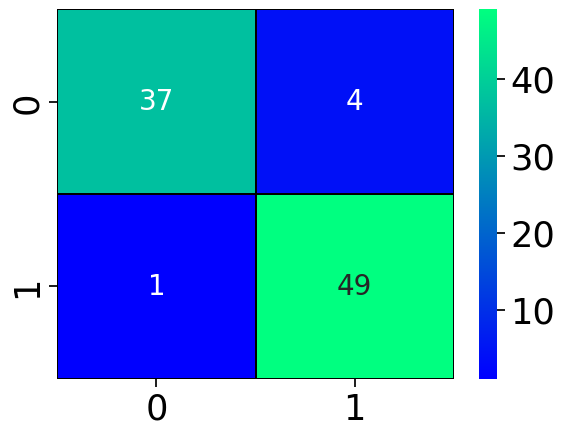

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(X, y)
prediction=m.predict(X_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

**Inference:** From the above report, we get the accuracy of the Decision Tree classifier is about 57%.

**Random Forest Classifier**

81.32
Testing Accuracy for Random Forest: 0.8131868131868132
Testing Sensitivity for Random Forest: 0.8
Testing Specificity for Random Forest: 0.8235294117647058
Testing Precision for Random Forest: 0.7804878048780488


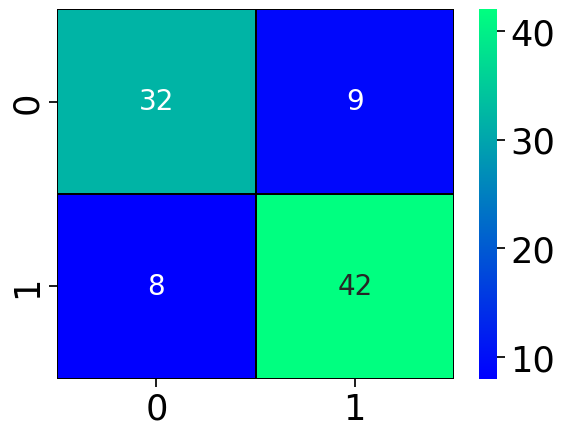

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



**Inference:** From the above report, we can get the accuracy of the Random Forest classifier is about 81%.

**Support Vector Machines(SVM)**

Testing Accuracy for SVM: 0.8131868131868132
Testing Sensitivity for SVM: 0.8
Testing Specificity for SVM: 0.8235294117647058
Testing Precision for SVM: 0.7804878048780488


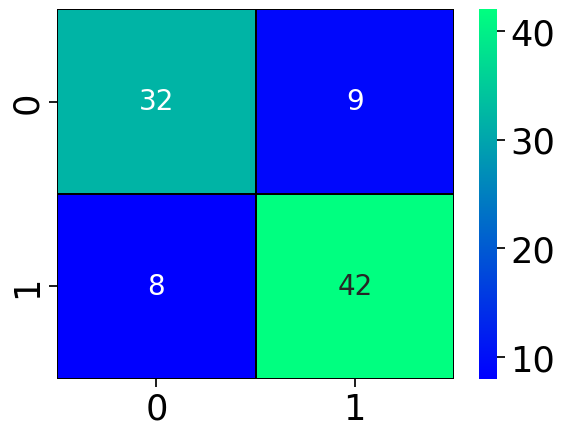

In [ ]:
  from sklearn.svm import SVC
  svm=SVC(C=10,kernel='linear')
  model4=svm.fit(X_train,y_train)
  prediction4=model4.predict(X_test)
  cm4= confusion_matrix(y_test,prediction4)
  sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
  TP=cm4[0][0]
  TN=cm4[1][1]
  FN=cm4[1][0]
  FP=cm4[0][1]

  print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
  print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
  print('Testing Specificity for SVM:',(TN/(TN+FP)))
  print('Testing Precision for SVM:',(TP/(TP+FP)))


In [ ]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



**Inference:** From the above report, we get the accuracy of the Support Vector Machine classifier is about 90%.

Testing Accuracy for KNN:  0.6593406593406593
Testing Sensitivity for KNN: 0.6136363636363636
Testing Specificity for KNN: 0.7021276595744681
Testing Precision for KNN: 0.6585365853658537


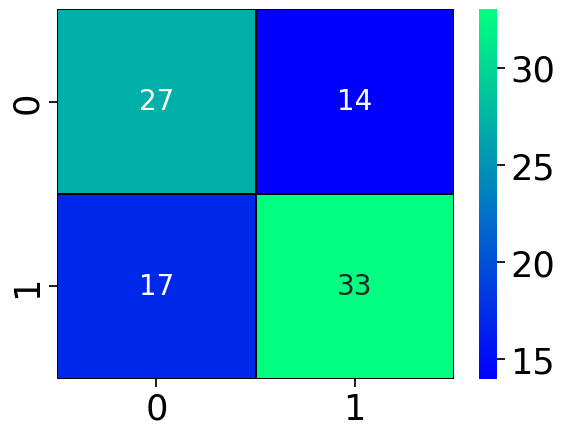

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
prediction5 = knn.predict(X_test)
cm5 = confusion_matrix(y_test, prediction5)
sns.heatmap(cm5, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size":20})
TP = cm5[0][0]
TN = cm5[1][1]
FN = cm5[1][0]
FP = cm5[0][1]
print('Testing Accuracy for KNN: ', (TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for KNN:', (TP/(TP+FN)))
print('Testing Specificity for KNN:', (TN/(TN+FP)))
print('Testing Precision for KNN:', (TP/(TP+FP)))

In [ ]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.61      0.66      0.64        41
           1       0.70      0.66      0.68        50

    accuracy                           0.66        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.66      0.66      0.66        91



From the results that we got, as four machine learning algorithms like Logistic Regression, Random Forest, Support Vector Machines and Decision Trees. From the final results, we got

**Logistic Regression as 80%,**

**Decision Trees as 94%,**

**Random Forest as 81%,**

**Support Vector Machines as 81%,**

**KNN as 65%**

We can conclude that the **Decision Tree ** is the best algorithm for our model with the highest accuracy around **94 percent**.

# **Final Model Implementation**

Now, we can apply the best working algorithm (i.e., SVM) into our model and check whether our model will result in the correct output or not with the help of available data.

**CASE 1 – For Normal Data**


In [ ]:
input=(60,1,0,117,230,1,1,160,1,1.4,2,2,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==0):
  print("The patient seems to be Normal:(")
else:
  print("The patient seems to be have heart disease:)")



The patient seems to be Normal:(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**CASE 2 - For Heart Disease Data**

In [ ]:
input=(63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==0):
  print("The patient seems to be Normal:(")
else:
  print("The patient seems to be have heart disease:)")

The patient seems to be have heart disease:)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
